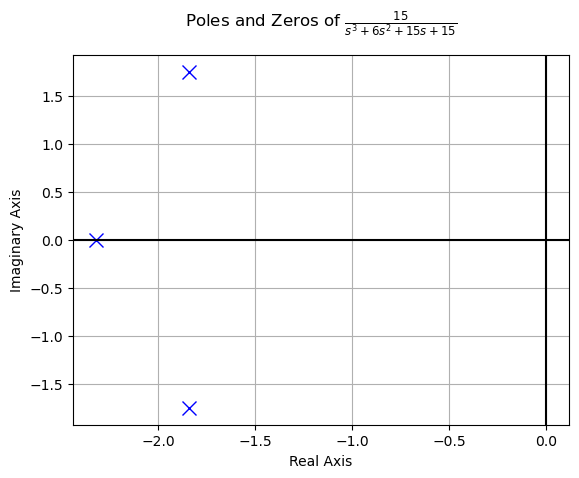

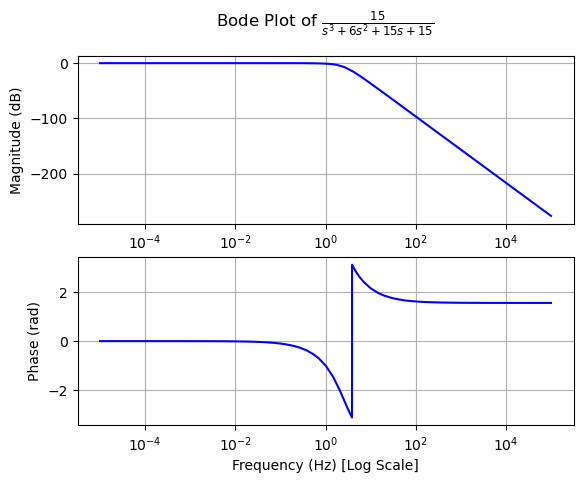

In [1]:
import sympy as sp
from sympy import ground_roots, real_roots, nroots
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot
import matplotlib.pyplot as plt
from scipy import signal as sig
import splane as tc2

s = sp.symbols('s', complex=True)

w = sp.symbols('w', complex=True)

T_s = 15/(s**3 + 6*s**2 +15*s +15)
T_s_ = 15/(-s**3 + 6*s**2 -15*s +15)

T_s_num, T_s_den = sp.fraction(sp.factor(T_s))

tf_ts = TransferFunction(T_s_num, T_s_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf_ts, show  = False) 
display(fig)

bode_plot(tf_ts)


In [2]:
S_21 = T_s

S_11_2 = sp.cancel(T_s*T_s_ - 1)

display(S_11_2)

n,d = sp.fraction(S_11_2)

#roots1 = real_roots(n)
#roots2 = nroots(n)

#roots3 = real_roots( d )
#roots4 = nroots(d)

#display(roots1)
#display(roots2)
#display(roots3)
#display(roots4)

S_11= tc2.modsq2mod_s(S_11_2)

display(S_11)


(-s**6 + 6*s**4 - 45*s**2)/(s**6 - 6*s**4 + 45*s**2 - 225)

s*(s**2 + 2*sqrt(3)*5**(1/4)*s*cos(atan(2)/2) + 3*sqrt(5))/(s**3 + 6*s**2 + 15*s + 15)

(-2*s**3 - 6*s**2 - 2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) - 15*s - 3*sqrt(5)*s - 15)/(-6*s**2 + 2*sqrt(3)*5**(1/4)*s**2*cos(atan(2)/2) - 15*s + 3*sqrt(5)*s - 15)

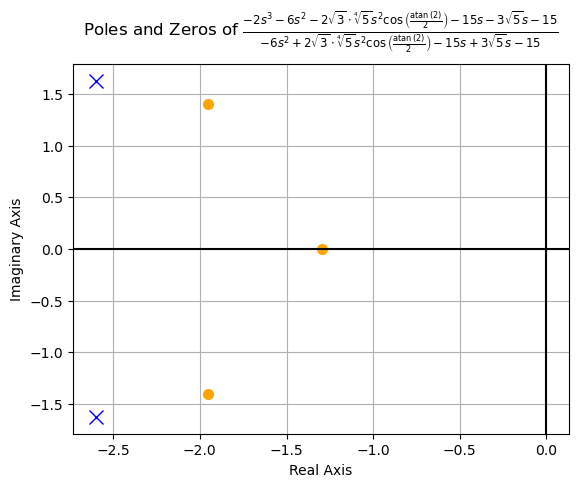

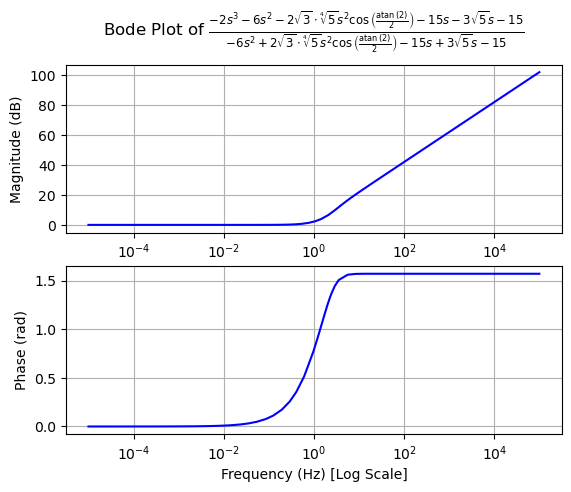

In [8]:
## Anoto los resultados de display, luego:
#num = s*(s + complex(2.20320266118432,1.36165412871613) ) * (s + complex(2.20320266118432,-1.36165412871613) )
#den = (s + 2.32218535462609)*(s + complex(1.83890732268696,- 1.75438095978372) )*(s + complex(1.83890732268696, 1.75438095978372) )
#S_11 = num  / den

R_0 = 1

Z1 = R_0 * sp.simplify(sp.expand(sp.simplify(sp.expand(1+S_11))/sp.simplify(sp.expand((1-S_11)))))

Z1 = sp.cancel(sp.simplify(Z1))

Z1_num, Z1_den = sp.fraction(sp.factor(Z1))

tf1 = TransferFunction(Z1_num, Z1_den, s)

fig = plt.figure()  # a new figure window
ax = pole_zero_plot(tf1, show  = False) 

display(fig)

bode_plot(tf1)



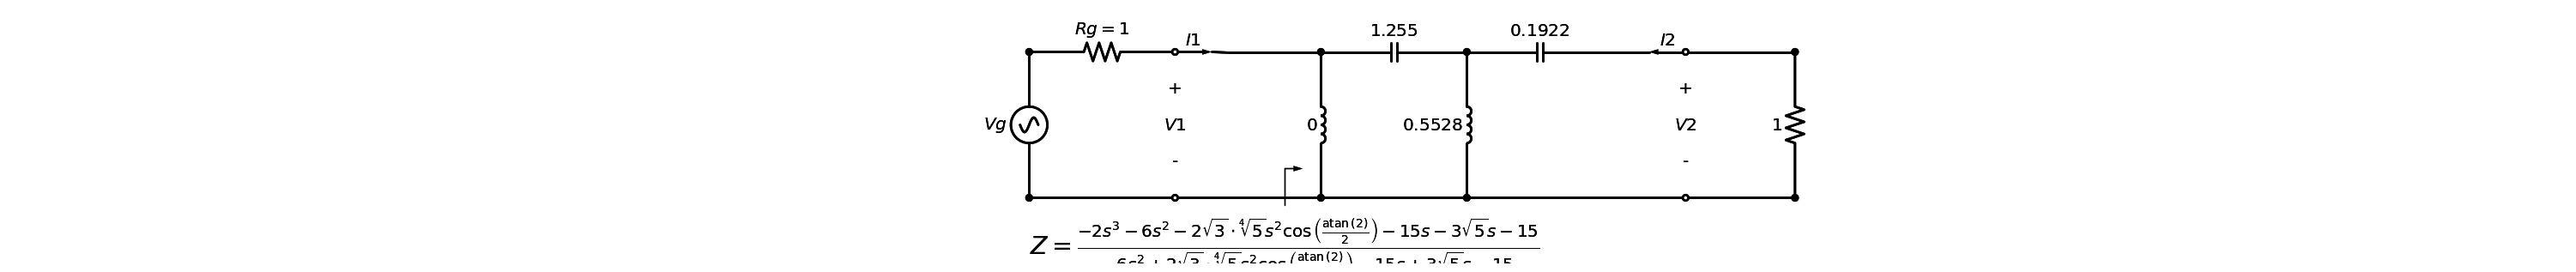

In [7]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import SourceSin, Resistor, Capacitor, Inductor

# Para sintetizar la red cumpliendo con la transferencia tengo que remover los polos en infinito

Y2, YA = tc2.remover_polo_infinito(1/Z1)

la = YA / s

Z3, ZB = tc2.remover_polo_infinito(1/Y2)

cb = ZB / s

Y4, YC = tc2.remover_polo_infinito(1/Z3)

lc = YC / s

Z5, ZD = tc2.remover_polo_infinito(1/Y4)

cd = ZD / s

ge = sp.cancel(sp.simplify(Z5))

# Dibujo de la red sintetizada

d = Drawing(unit=4)

d = tc2.dibujar_elemento_derivacion(d, SourceSin, 'Vg')

d = tc2.dibujar_elemento_serie(d, Resistor, "Rg=1")

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Inductor, la.evalf(4))

d = tc2.dibujar_elemento_serie(d, Capacitor, cb.evalf(4))

d = tc2.dibujar_elemento_derivacion(d, Inductor, lc.evalf(4))

d = tc2.dibujar_elemento_serie(d, Capacitor, cd.evalf(4))

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, ge )

display(d)

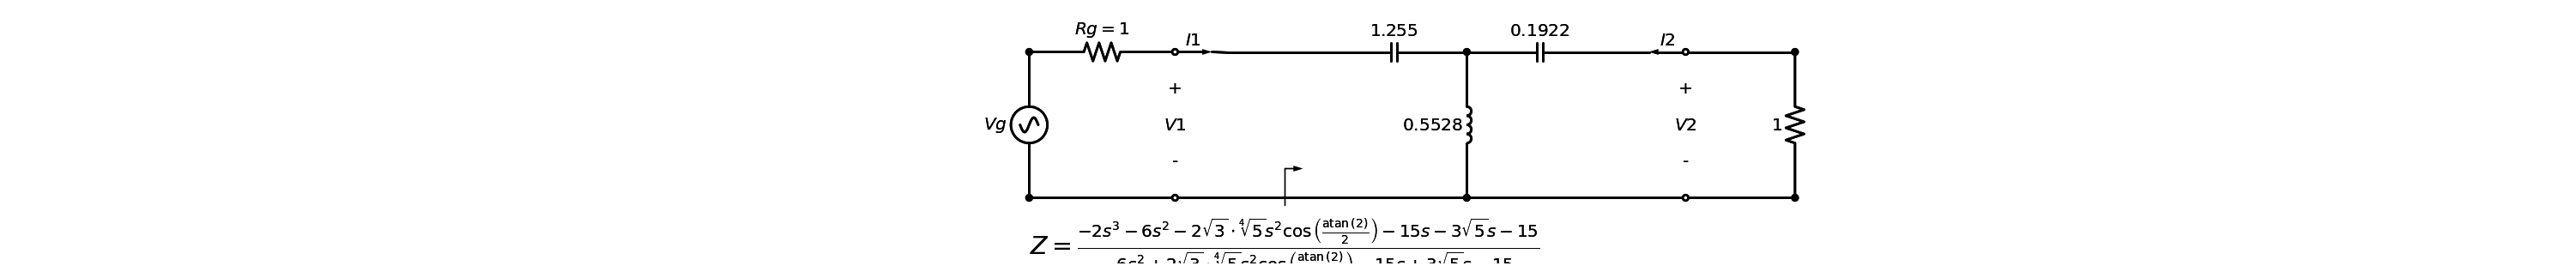

In [12]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import SourceSin, Resistor, Capacitor, Inductor

# Para sintetizar la red cumpliendo con la transferencia tengo que remover los polos en infinito

Z11, ZA = tc2.remover_polo_infinito(Z1)

ca = ZA / s

Y2, YA = tc2.remover_polo_infinito(1/Z11)

la = YA / s

Z3, ZB = tc2.remover_polo_infinito(1/Y2)

cb = ZB / s

Y4, YC = tc2.remover_polo_infinito(1/Z3)

ge = sp.cancel(sp.simplify(Y4))



# Dibujo de la red sintetizada

d = Drawing(unit=4)

d = tc2.dibujar_elemento_derivacion(d, SourceSin, 'Vg')

d = tc2.dibujar_elemento_serie(d, Resistor, "Rg=1")

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, ca.evalf(4))

d = tc2.dibujar_elemento_derivacion(d, Inductor, la.evalf(4))

d = tc2.dibujar_elemento_serie(d, Capacitor, cb.evalf(4))

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, ge )

display(d)

In [5]:
from sympy import pdiv
from sympy import Poly


Poly(Z1_den, s).pdiv(Poly(Z1_num,s))

Z2, ZA = tc2.remover_polo_infinito(Z1)

Y3, YB = tc2.remover_polo_infinito(1/Z2)

Z4, ZC = tc2.remover_polo_infinito(1/Y3)

Y5, YD = tc2.remover_polo_infinito(1/Z4)

Y5 = sp.cancel(sp.simplify(Y5))

